In [1]:
from pylab import plot, show, subplot, xlabel, ylabel, figure, legend, array

# Strikkhopp

Nå har vi skrevet kode som simulerer fallskjermhopp, og da er det ikke så lang vei til å simulere strikkhopp og. Men først, la oss se koden for fallskjermhopp. Først definerer vi noen funksjoner for bevegelseslikningene og luftmotstanden

In [2]:
def finn_høyde(h0, v0, a, t):
    return h0 + v0*t + 0.5*a*t*t

def finn_fart(v0, a, t):
    return v0 + a*t

def luftmotstand(v, A, C, rho):
    return 0.5*A*C*rho*v*v

Så simulerer vi fallskjermhoppet og lagrer simuleringsverdiene i lister som vi plotter etterpå.

In [3]:
g = 9.81  # m/s/s
m = 90  # kg

h = 1000  # m
v = 0  # m/s
t = 0  # s

rho = 1

t_liste = [t]
h_liste = [h]
v_liste = [v]
a_liste = [-g]

dt = 0.01
fallskjermtid = 10
while h > 0:
    if t < fallskjermtid:
        A = 0.7
        C = 1.4
    else:
        A = 44
        C = 1.8
    sum_krefter = -g*m + luftmotstand(v, A, C, rho)
    a = sum_krefter/m
    
    h = finn_høyde(h, v, a, dt)
    v = finn_fart(v, a, dt)
    t = t + dt
    
    h_liste.append(h)
    v_liste.append(v)
    t_liste.append(t)
    a_liste.append(a)

Kode for å plotte resultatet fra simuleringen

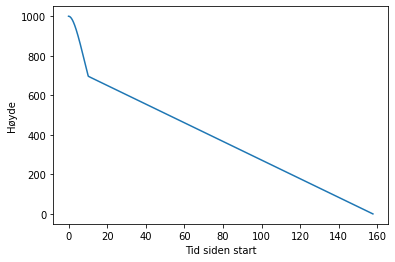

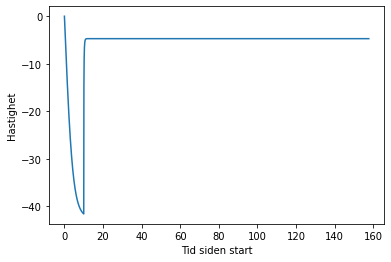

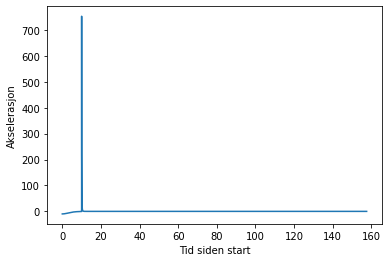

In [4]:
plot(t_liste, h_liste)
xlabel("Tid siden start")
ylabel("Høyde")
show()

plot(t_liste, v_liste)
xlabel("Tid siden start")
ylabel("Hastighet")
show()

plot(t_liste, a_liste)
xlabel("Tid siden start")
ylabel("Akselerasjon")
show()

## Introduksjon til strikkhopp

Når vi hopper strikk er det enten to eller tre krefter som virker på oss. Tyngdekraften og luftmotstanden virker alltid, og strikkraften virker dersom $|h| > h_\text{strikk}$, hvor $h_\text{strikk}$ er lengden på strikken. Grunnen til at strikkraften ikke alltid virker på oss, er at strikkraften virker kun mens strikket blir strukket, ikke mens det er kveilet opp. Litt som i figuren under.

<div style="overflow:auto;margin:auto;width:420px">
<img src="https://raw.githubusercontent.com/kodeskolen/tekna_h21_videre/main/dag2/notebooks_dag2/Fallskjermhopp/bilder/strikkhopper_1.png" width="140px" align="left" style="margin:0px;"/>
<img src="https://raw.githubusercontent.com/kodeskolen/tekna_h21_videre/main/dag2/notebooks_dag2/Fallskjermhopp/bilder/strikkhopper_2.png" width="140px" align="left" style="margin:0px;"/>
<img src="https://raw.githubusercontent.com/kodeskolen/tekna_h21_videre/main/dag2/notebooks_dag2/Fallskjermhopp/bilder/strikkhopper_3.png" width="140px" align="left" style="margin:0px;"/>
</div>
    
For å finne akselerasjonen til systemet, bruker vi Newton's andre lov, som sier at

$$ \sum F = -G - \text{sign}(v)D(v) - \text{sign}(h)S(h) = m a,$$

hvor $\text{sign}(v)D(v)$ er luftmotstanden (vi ganger med et fortegn som peker motsatt retning av hastigheten for å passe på at luftmotstanden bremser) og $S(h)$ er strikkraften, som er gitt av Hookes lov (vi ganger strikkraften med et fortegn som peker i motsatt retning av $h$ slik at strikkraften alltid peker mot punktet der strikket starter å strekke):

$$ S(h) = \begin{cases} k |h| - h_\text{strikk} & ,~|h| > h_\text{strikk} \\ 0 & ,~ \text{ellers}\end{cases}.$$

## Oppgave 1
### Oppgave 1a)
Lag en funksjon `strikkraft(h, k, h_strikk)` som tar inn posisjonen til strikkhopperen, $h$, strikkonstanten, $k$, og strikklengden,  $h_\text{strikk}$ og returnerer strikkraften til strikket gitt ved funksjonen over. (**Hint:** Du kan bruke `abs` funksjonen for å ta absoluttverdien til et tall)

In [5]:
def strikkraft(h, k, h_strikk):
    """Regner ut strikkreftene til et strikk med lengde h_strikk og strikkonstant k.
    """
    if abs(h) > h_strikk:
        return k*(abs(h) - h_strikk)
    else:
        return 0

### Oppgave 1b)
Nedenfor er skjelletkode for å simulere et strikkhopp. Fyll inn de manglende linjene . Bruk $A=0.7~\text{m}^2$, $C=1.4$, $\rho=1\tfrac{\text{kg}}{\text{m}^3}$ $h_\text{strikk} = 40~\text{m}$ og $k=50 \text{N}/\text{m}$. Stopp simuleringen når hastigheten peker i positiv retning igjen (altså når strikkhopperen er på vei opp igjen). (**Hint:** Fjern betingelsen og modifiser linja hvor du regner ut summen av kreftene).

In [6]:
from pylab import sign

g = 9.81  # m/s/s
m = 90  # kg

h = 0  # m
v = 0  # m/s
t = 0  # s

A = 0.7
C = 1.4
rho = 1
k = 100
h_strikk = 80

t_liste = [t]
h_liste = [h]
v_liste = [v]
a_liste = [-g]

dt = 0.001
fallskjermtid = 10
while t <= 60:
    sum_krefter = -g*m - sign(v)*luftmotstand(v, A, C, rho) - sign(h)*strikkraft(h, k, h_strikk)
    a = sum_krefter/m
    
    h = finn_høyde(h, v, a, dt)
    v = finn_fart(v, a, dt)
    t = t + dt
    
    h_liste.append(h)
    v_liste.append(v)
    t_liste.append(t)
    a_liste.append(a)

### Oppgave 1c)
Lag et plott av posisjonen, hastigheten og akselerasjonen til strikkhopperen som funksjon av tid. (**Hint:** Du kan ta utgangspunkt i koden for fallskjermhopp)

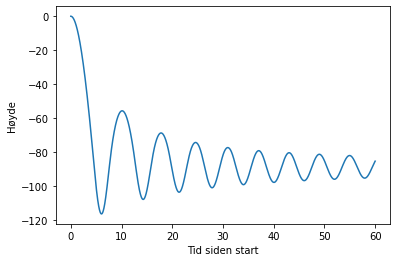

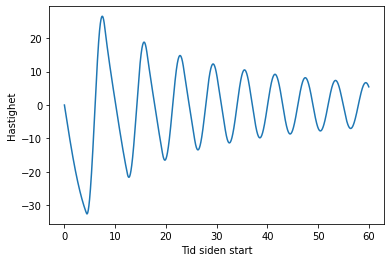

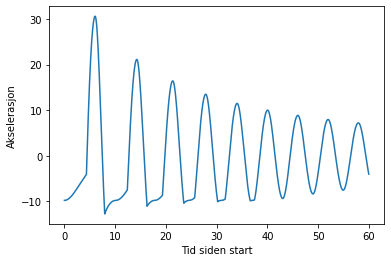

In [7]:
plot(t_liste, h_liste)
xlabel("Tid siden start")
ylabel("Høyde")
show()

plot(t_liste, v_liste)
xlabel("Tid siden start")
ylabel("Hastighet")
show()

plot(t_liste, a_liste)
xlabel("Tid siden start")
ylabel("Akselerasjon")
show()

### Oppgave 1d)
Lag en funksjon `plott_strikkhopp(A, C, k, strikklengde)` som tar tverrsnittsarealet til hopperen, $C$, strikkonstanten og strikklengde, simulerer et strikkhopp og plotter posisjonen, hastigheten og akselerasjonen til strikkhopperen som funksjon av tid.

In [8]:
def plott_strikkhopp(A, C, k, strikklengde):
    g = 9.81  # m/s/s
    m = 90  # kg

    h = 0  # m
    v = 0  # m/s
    t = 0  # s

    rho = 1

    t_liste = [t]
    h_liste = [h]
    v_liste = [v]
    a_liste = [-g]

    dt = 0.001
    fallskjermtid = 10
    while t <= 60:
        sum_krefter = -g*m - sign(v)*luftmotstand(v, A, C, rho) - sign(h)*strikkraft(h, k, h_strikk)
        a = sum_krefter/m

        h = finn_høyde(h, v, a, dt)
        v = finn_fart(v, a, dt)
        t = t + dt

        h_liste.append(h)
        v_liste.append(v)
        t_liste.append(t)
        a_liste.append(a)
        
    plot(t_liste, h_liste)
    xlabel("Tid siden start")
    ylabel("Høyde")
    show()

    plot(t_liste, v_liste)
    xlabel("Tid siden start")
    ylabel("Hastighet")
    show()

    plot(t_liste, a_liste)
    xlabel("Tid siden start")
    ylabel("Akselerasjon")
    show()

### Oppgave 1e)
Bruk `interact`-funksjonen fra `ipywidgets`-biblioteket for å knytte `plott_strikkhopp`-funksjonen opp mot glidebrytere for å lage et interaktivt plott. Hva skjer med maksimalhastigheten når du øker strikkkonstanten?

In [9]:
from ipywidgets import interact

interact(
    plott_strikkhopp,
    A=(0., 2),
    C=(1., 2),
    k=(0., 50),
    strikklengde=(0., 100)
)

interactive(children=(FloatSlider(value=1.0, description='A', max=2.0), FloatSlider(value=1.5, description='C'…

<function __main__.plott_strikkhopp(A, C, k, strikklengde)>